In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')


In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# checking for any nul values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Visualizations

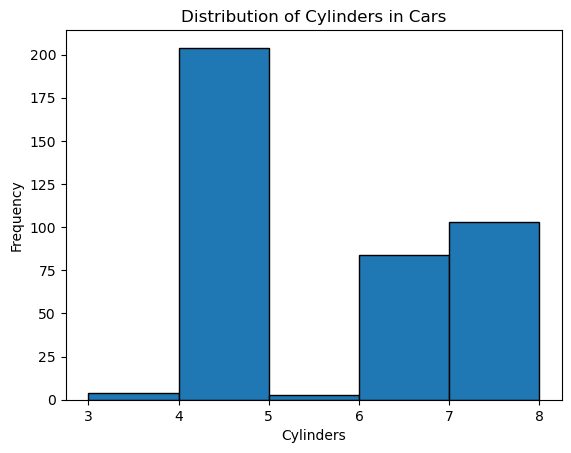

In [5]:
# Univariate Analysis
plt.hist(df['cylinders'], bins=5, edgecolor='black')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title('Distribution of Cylinders in Cars')
plt.show()

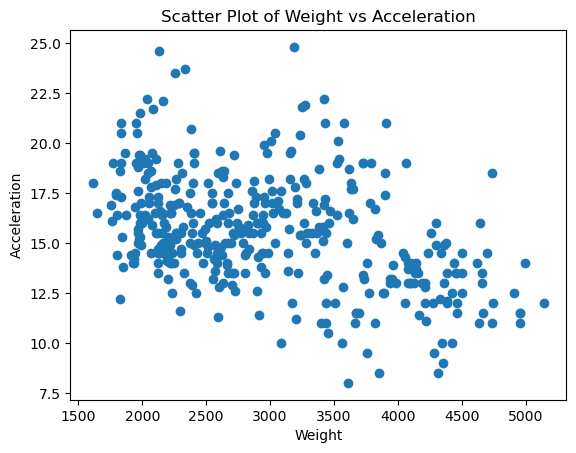

In [6]:
# Bivariate Analysis
plt.scatter(df['weight'], df['acceleration'])
plt.xlabel('Weight')
plt.ylabel('Acceleration')
plt.title('Scatter Plot of Weight vs Acceleration')
plt.show()

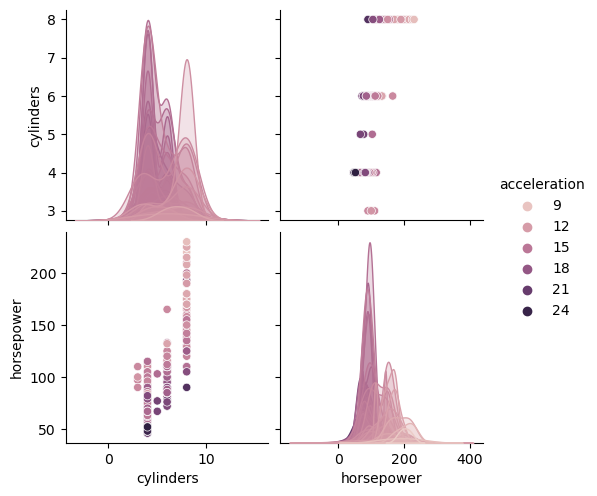

In [7]:
# Multivariate Analysis
df_sub = df[['cylinders', 'horsepower', 'acceleration']]
sns.pairplot(df_sub, hue='acceleration')
plt.show()

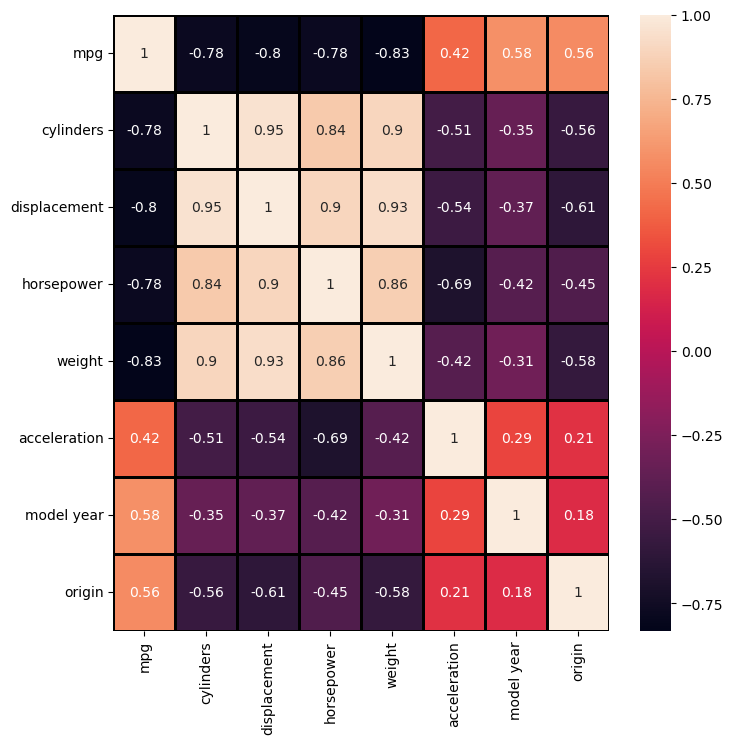

In [8]:
corr_df=df.iloc[:,:-1]
sns.heatmap(corr_df.corr(), annot=True, linecolor = 'black', linewidths = 1)
fig = plt.gcf()
fig.set_size_inches(8,8)

# Descriptive Statistics

In [9]:
# Measures of Central Tendency
print("Mean of data")
corr_df.mean()

Mean of data


mpg               23.514573
cylinders          5.454774
displacement     193.425879
horsepower       104.165829
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [10]:
print("Kurtosis")
corr_df.kurt()

Kurtosis


mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.753032
weight         -0.785529
acceleration    0.419497
model year     -1.181232
origin         -0.817597
dtype: float64

In [11]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
df.mode()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,13.0,4.0,97.0,150.0,1985,14.5,73.0,1.0,ford pinto
1,NaN,NaN,NaN,NaN,2130,NaN,NaN,NaN,NaN


In [13]:
# Measures of Dispersion/Variability
num_cols = df.select_dtypes(include=[np.number]).columns
max_vals = df[num_cols].max()
min_vals = df[num_cols].min()
range = max_vals - min_vals
range

mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
model year        12.0
origin             2.0
dtype: float64

In [14]:
quantile = corr_df.quantile(q=[0.75,0.25])
quantile

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0.75,29.0,8.0,262.00,125.0,3608.00,17.175,79.0,2.0
0.25,17.5,4.0,104.25,75.0,2223.75,13.825,73.0,1.0


In [15]:
IQR = quantile.iloc[0] - quantile.iloc[1]
IQR

mpg               11.50
cylinders          4.00
displacement     157.75
horsepower        50.00
weight          1384.25
acceleration       3.35
model year         6.00
origin             1.00
dtype: float64

In [16]:
upper_extreme = quantile.iloc[0] + (1.5*IQR)
upper_extreme

mpg               46.250
cylinders         14.000
displacement     498.625
horsepower       200.000
weight          5684.375
acceleration      22.200
model year        88.000
origin             3.500
dtype: float64

In [17]:
lower_extreme = quantile.iloc[1] - (1.5* IQR)
lower_extreme

mpg               0.250
cylinders        -2.000
displacement   -132.375
horsepower        0.000
weight          147.375
acceleration      8.800
model year       64.000
origin           -0.500
dtype: float64

In [18]:
print("Variance")
corr_df.var()

Variance


mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1466.788552
weight          717140.990526
acceleration         7.604848
model year          13.672443
origin               0.643292
dtype: float64

In [19]:
print("Standard Deviation")
corr_df.std()

Standard Deviation


mpg               7.815984
cylinders         1.701004
displacement    104.269838
horsepower       38.298676
weight          846.841774
acceleration      2.757689
model year        3.697627
origin            0.802055
dtype: float64

In [20]:
df['car name'].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car name, Length: 305, dtype: int64

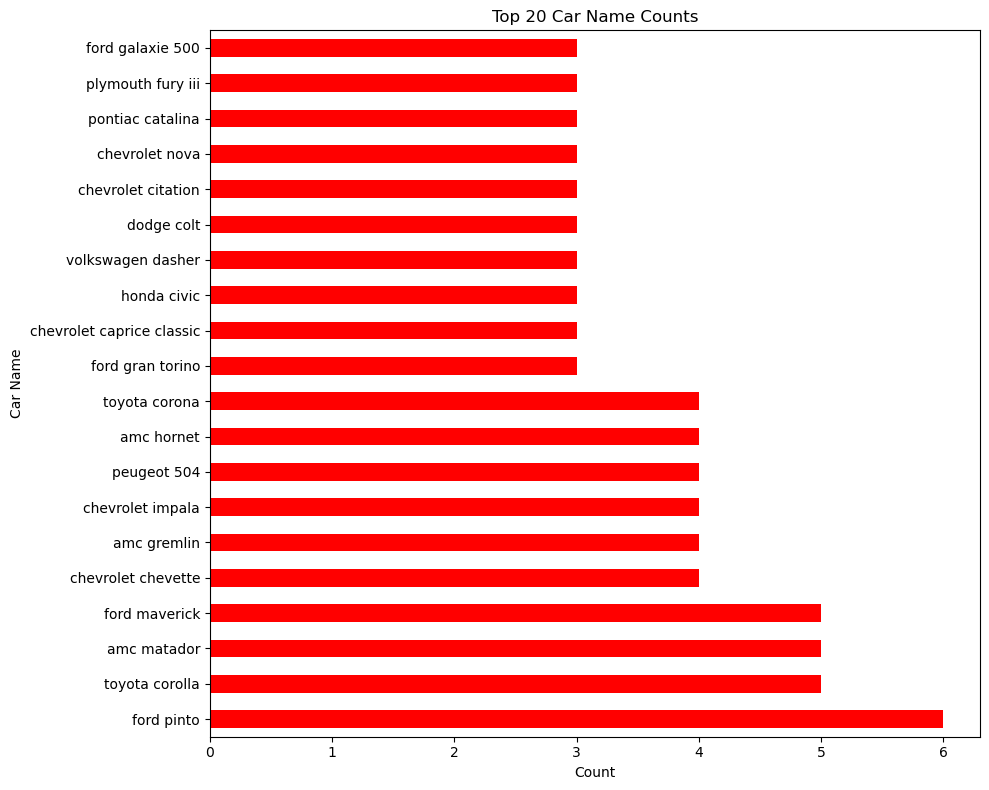

In [21]:
import matplotlib.pyplot as plt

car_counts = df['car name'].value_counts()

# Get the top 20 most frequent categories
top_20_car_counts = car_counts.head(20)

# Plotting
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
top_20_car_counts.plot(kind='barh', color='red')  # Sort values for better readability
plt.title('Top 20 Car Name Counts')
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.tight_layout()
plt.show()


In [22]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.165829,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.298676,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Handle Missing Values

In [23]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Outlier Detection and Replacement

/Users/biggyatpandey/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

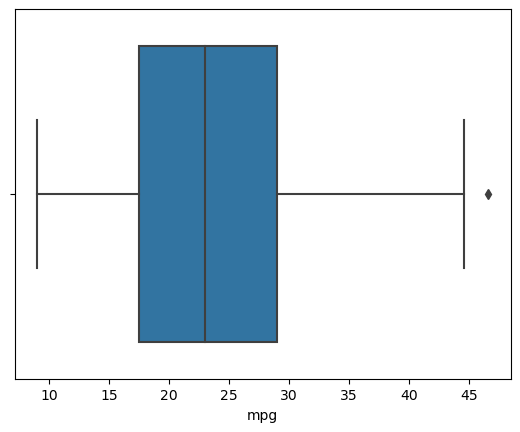

In [24]:
sns.boxplot(df.mpg)

In [25]:
perc99_mpg = df.mpg.quantile(0.99)
perc99_mpg

43.417999999999985

/Users/biggyatpandey/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

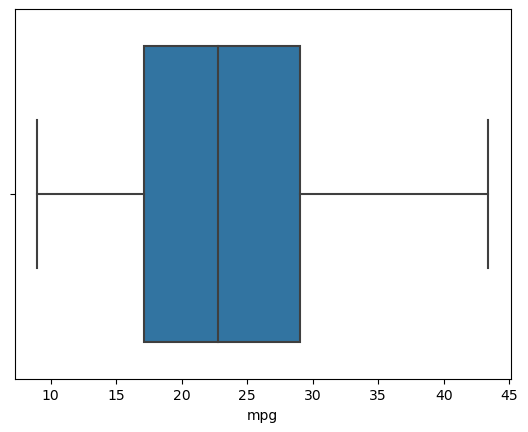

In [26]:
df = df[df.mpg <= perc99_mpg]
sns.boxplot(df.mpg)

In [27]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Encode the Data

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['car name'] = le.fit_transform(df['car name'])

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36
2,18.0,8,318.0,150,3436,11.0,70,1,229
3,16.0,8,304.0,150,3433,12.0,70,1,14
4,17.0,8,302.0,140,3449,10.5,70,1,161


# Split the data into dependent and independent variables

In [30]:
y = pd.DataFrame(df['mpg'])
X = df.iloc[:,1:8]

In [31]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [32]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [33]:
X.shape, y.shape

((394, 7), (394, 1))

# Split the data into training and testing

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [35]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
42,8,383.0,180,4955,11.5,71,1
393,4,140.0,86,2790,15.6,82,1
56,4,91.0,70,1955,20.5,71,1
195,4,85.0,52,2035,22.2,76,1
186,4,101.0,83,2202,15.3,76,2


In [36]:
y_train.head()

,mpg
42,12.0
393,27.0
56,26.0
195,29.0
186,27.0


In [37]:
X_train.shape, y_train.shape

((315, 7), (315, 1))

In [38]:
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
318,4,134.0,90,2711,15.5,80,3
182,4,107.0,86,2464,15.5,76,2
386,6,181.0,110,2945,16.4,82,1
304,4,91.0,69,2130,14.7,79,2
315,4,151.0,90,3003,20.1,80,1


In [39]:
y_test.head()

,mpg
318,29.8
182,28.0
386,25.0
304,37.3
315,24.3


In [40]:
X_test.shape, y_test.shape

((79, 7), (79, 1))

# Build, Train, Test and Evaluate Model

In [41]:
models = {}

In [42]:
# Multi Linear Regression
from sklearn.linear_model import LinearRegression
models['Multi Linear Regression'] = LinearRegression()

In [43]:
# Support Vector Regressor
from sklearn.svm import SVR
models['Support Vector Regressor'] = SVR(kernel='rbf', C=0.5, epsilon=0.1)

In [44]:
# K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
models['K Neighbors Regressor'] = KNeighborsRegressor(n_neighbors=3)

In [45]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
models['Random Forest Regressor'] = RandomForestRegressor(n_estimators=250, criterion="squared_error", max_depth=None)

In [46]:
from sklearn.metrics import mean_squared_error
rmse = {}
for key in models.keys():
    models[key].fit(X_train, y_train)   
    pred = models[key].predict(X_test)
    rmse[key] = mean_squared_error(pred, y_test, squared=False)

/Users/biggyatpandey/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/8h/rt74l60d0mlbxd19fjc6gy9m0000gn/T/ipykernel_80432/3685344049.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models[key].fit(X_train, y_train)


In [47]:
df_model = pd.DataFrame(index=models.keys(), columns=['RMSE'])
df_model['RMSE'] = rmse.values()
df_model

,RMSE
Multi Linear Regression,3.487866
Support Vector Regressor,5.209404
K Neighbors Regressor,4.434033
Random Forest Regressor,2.900625


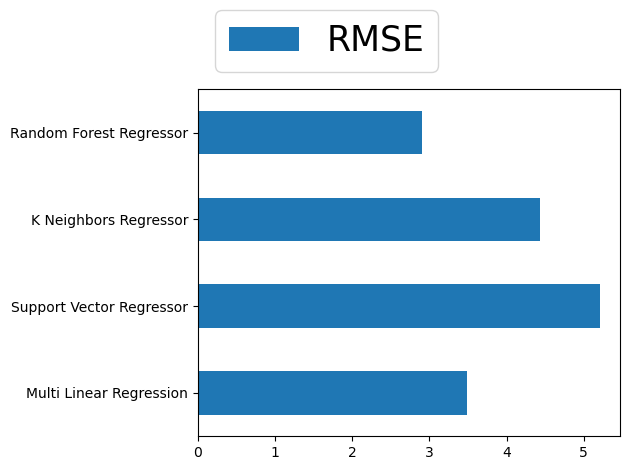

In [48]:
gr = df_model.plot.barh()
gr.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 25}
)
plt.tight_layout()

## We can see that Random Forest Regressor has performed the best. 

In [49]:
rtf = RandomForestRegressor(n_estimators=250, criterion="squared_error", max_depth=None)
rtf.fit(X_train, y_train)   
y_pred = rtf.predict(X_test)
y_pred

/var/folders/8h/rt74l60d0mlbxd19fjc6gy9m0000gn/T/ipykernel_80432/3047472252.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rtf.fit(X_train, y_train)


array([29.0464, 24.5092, 25.3696, 33.9836, 26.074 , 26.6924, 18.0568,
       31.1764, 14.5796, 17.9072, 13.968 , 13.126 , 17.0296, 17.4088,
       21.9936, 14.192 , 29.2588, 32.0708, 24.1864, 36.9964, 19.752 ,
       30.2488, 14.4436, 23.8184, 16.9436, 31.7884, 29.5156, 35.0124,
       26.24  , 36.488 , 19.484 , 32.7344, 28.5996, 20.478 , 20.2712,
       19.1172, 25.6756, 12.884 , 33.3508, 27.174 , 20.1328, 24.1148,
       22.926 , 28.1636, 19.424 , 24.3676, 33.032 , 28.19  , 12.004 ,
       37.802 , 34.8456, 27.236 , 25.544 , 21.7972, 14.128 , 22.1184,
       34.74  , 25.0384, 15.508 , 17.2004, 20.0436, 15.9956, 30.958 ,
       24.1608, 24.6476, 14.148 , 28.3052, 32.694 , 25.862 , 34.6044,
       27.684 , 29.6292, 18.7364, 34.1092, 13.58  , 23.7924, 18.4012,
       18.6796, 34.7216])

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
print('Mean Squared Error =',mse)

Mean Squared Error = 8.608893721518978


In [52]:
print('Mean Absolute Error =',mae)

Mean Absolute Error = 2.0752253164556986


In [53]:
print('R2 Score =',r2)

R2 Score = 0.8537399501103075


In [54]:
rtf.predict([[6,199,90,2648,15,70,1]]) #Checking the model with sample input

/Users/biggyatpandey/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([21.1136])

In [55]:
import pickle
pickle_out = open("model.pkl", "wb")
pickle.dump(rtf, pickle_out) 
pickle_out.close()

# deployment using IBM watson

In [56]:
!pip install -U ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 541.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 649.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.9/913.9 kB 711.9 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 712.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.11.0-py3-none-any.whl size=73641 sha256=ed063f7863ec0baabd21f7ac5a18cc4aee57eb0135662d51769471ec706e4a4c
  Stored in directory: /Users/biggyatpandey/Library/Caches/pip/wheels/d3/a5/34/52d2e378d3d0446989ebcd214af8bad55beecf905258852b9f
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.11.0-py3-none-any.whl size=536333 sha256=388c0e4103a4242da9005c0da035679c15eda2e4ff5062d37a57782dff27647b
  Stored in directory: /Users/biggyatpandey/Library/C